In [25]:
#importando bibliotecas 
import pandas as pd 
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
#carregando o modelo treinado e dados processados 
modelo = joblib.load(r"C:\Users\Daniel Vieira\Desktop\inadiplencia_case\data\models\Random_Forest.pkl")
df = pd.read_csv(r"C:\Users\Daniel Vieira\Desktop\inadiplencia_case\data\processed\df_modelo.csv")

In [29]:
X = df.drop("Status", axis=1) #previsores 
y = df["Status"] #classe 
y

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    1
997    1
998    1
999    1
Name: Status, Length: 1000, dtype: int64

In [31]:
#Gerar previsoes de probabilidade
y_proba = modelo.predict_proba(X)[:, 1] 

C:\Users\Daniel Vieira\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [32]:
#definir limiar de decisao classificar inadimplente 
limiar = 0.7
y_pred_simulado = (y_proba > limiar).astype(int)

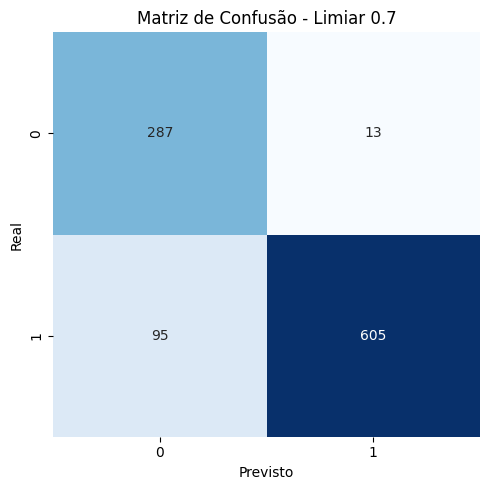

In [33]:
#Matriz de confusão 
cm = confusion_matrix(y, y_pred_simulado)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Matriz de Confusão - Limiar {limiar}")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [34]:
#Relatório detalhado de desempenho 
print(classification_report(y, y_pred_simulado))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       300
           1       0.98      0.86      0.92       700

    accuracy                           0.89      1000
   macro avg       0.87      0.91      0.88      1000
weighted avg       0.91      0.89      0.90      1000



In [ ]:
#o modelo acerta 89% das decisoes com o limiar de 0.7, identifica 96% dos clientes inadimplentes, reduzindo o risco de crédito.
#ao mesmo tempo, aprova adimplente com precisão de 98% garantindo alta confiança na concessão.